## Костюков Максим Сергеевич
Лабораторная работа номер 2
Введем начальные условия, узлы сетки и значения в них
Средствами sagemath введем переменую `x` и установим функцию

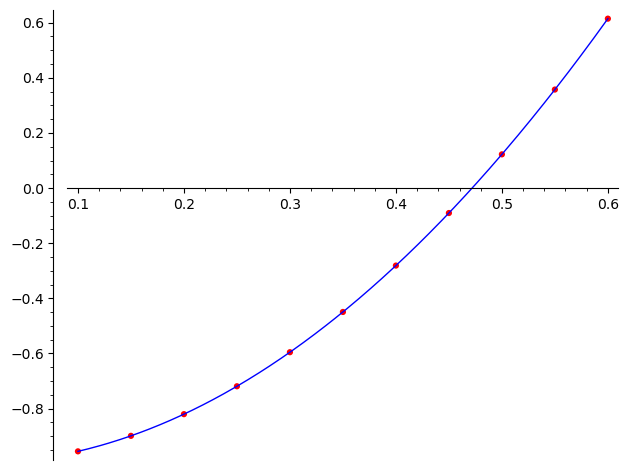

In [13]:
target_xs = [0.12, 0.57, 0.37]
left_border = 0.1
right_border = 0.6
steps_count = 10
step = (right_border - left_border)/steps_count
x_axis = [left_border + i * step for i in range(steps_count + 1)]


x = var('x')
y = 4*x-cos(x)

values = [y(x=i) for i in x_axis]
p = y.plot(xmin=left_border, xmax=right_border)
p += point(zip(x_axis, values), color='red', pointsize=20)
p.show()

Функция `lagrange` конструирует интерполяционный полином Лагранжа `n`-ого порядка.

Для `target_xs[0]` очевидно начало отрезка - ближайшая точка


In [14]:
t = (target_xs[0]-left_border) * 10 / (right_border - left_border)
print(t)

0.400000000000000


Очевидно релевантно использование 1-ой формулы Ньютона. Аналогичными рассуждениями получаем, что для `target_xs[1]` релевантно использование второй формулы Ньютона, поскольку она близка к концу отрезка
Напишем генератор конечных разностей вперед, а так же генератор разностей вперед для перенумерованных узлов

In [15]:
def findif(values):
    findifs = [[None for i in range(len(x_axis)-i)] for i in range(len(x_axis))]
    def get_divdif(n, starting_point):
        if findifs[starting_point][n] is not None:
            return findifs[starting_point][n]
        if n == 0:
            return values[starting_point]
        findifs[starting_point][n]=(get_divdif(n-1, starting_point+1)-get_divdif(n-1, starting_point))
        return findifs[starting_point][n]
    return get_divdif


def reverse_findif(values):
    findifs = [[None for i in range(len(x_axis) - i)] for i in range(len(x_axis))]

    def get_divdif(n, starting_point):
        if findifs[starting_point][n] is not None:
            return findifs[starting_point][n]
        if n == 0:
            return values[starting_point]
        findifs[starting_point][n] = (get_divdif(n - 1, starting_point) - get_divdif(n - 1, starting_point + 1))
        return findifs[starting_point][n]

    return get_divdif

findiffer = findif(values)
reverse_findiffer = reverse_findif(list(reversed(values)))

In [16]:
def FirstNewton(target_x):
    t = (target_x-left_border) * steps_count / (right_border - left_border)
    newton_formula = 0
    for i in range(steps_count+1):
        sum_element = findiffer(i, 0)
        # print(sum_element)
        for j in range(i):
            sum_element *= (t-j)
        sum_element /= factorial(i)
        newton_formula += sum_element
    return newton_formula

In [17]:
def SecondNewton(target_x):
    t = (target_x-right_border) * steps_count / (right_border - left_border)
    newton_formula = 0
    for i in range(steps_count+1):
        sum_element = reverse_findiffer(i, 0)
        # print(sum_element)
        for j in range(i):
            sum_element *= (t+j)
        sum_element /= factorial(i)
        newton_formula += sum_element
    return newton_formula

In [18]:
print("Вычисленное занчение в первой точке по первой формуле Ньютона:")
print(FirstNewton(target_x=target_xs[0]))
print(y(x=target_xs[0]))
print("Вычисленное занчение во второй точке по второй формуле Ньютона:")
print(SecondNewton(target_x=target_xs[1]))
print(y(x=target_xs[1]))


Вычисленное занчение в первой точке по первой формуле Ньютона:
-0.935208635853867
-0.935208635853866
Вычисленное занчение во второй точке по второй формуле Ньютона:
0.457699024837732
0.457699024837731


Для третьей точки очевидно, что так как

In [19]:
t = (target_xs[2]-x_axis[5])*steps_count/(right_border-left_border)
print(t, "<= 0.5")

0.400000000000000 <= 0.5


релевантно применение первой формулы Гаусса.

In [20]:
def FirstGauss(target_x):
    t = (target_x-x_axis[5])*steps_count/(right_border-left_border)

    gauss_function = 0
    last_t = 1
    for i in range(0, steps_count+1, 2):
        sum_element1 = findiffer(i, 5-i//2)
        if i != steps_count:
            sum_element2 = findiffer(i+1, 5-i//2)
        sum_element1 *= last_t
        last_t *= (t+i//2)
        sum_element1 /= factorial(i)
        if i != steps_count:
            sum_element2*=last_t
            last_t *= (t-i//2-1)
            sum_element2 /= factorial(i+1)
        gauss_function += sum_element1
        if i != steps_count:
            gauss_function += sum_element2

    return gauss_function

In [21]:
print("Вычисленное значение во второй точке по первой формуле Гаусса")
print(FirstGauss(target_x=target_xs[2]))
print(y(x=target_xs[2]))

Вычисленное значение во второй точке по первой формуле Гаусса
-0.384727345606034
-0.384727345606034


In [22]:
def omega(n):
    omega = 1
    for i in range(n):
        omega *= (x-x_axis[i])
    return omega
min_diff = min([diff(y, x, 11)(x=x_axis[i]) for i in range(11)])
# min_diff = find_local_minimum(diff(y, x, 11), left_border, right_border)[0]
max_diff = max([diff(y, x, 11)(x=x_axis[i]) for i in range(11)])
# max_diff = find_local_maximum(diff(y, x, 11), left_border, right_border)[0]

R10_min = min_diff/factorial(11)*omega(11)
R10_max = max_diff/factorial(11)*omega(11)


Проверим условие для всех `x`

In [23]:
# print(FirstNewton(target_xs[0]) - y(x=target_xs[0]))
print(R10_min(x=target_xs[0]) <= (FirstNewton(target_xs[0]) - y(x=target_xs[0])), "and",  (FirstNewton(target_xs[0]) - y(x=target_xs[0])) <= R10_max(x=target_xs[0]))
print(R10_min(x=target_xs[1]) <= (SecondNewton(target_xs[1]) - y(x=target_xs[1])), "and", (SecondNewton(target_xs[1]) - y(x=target_xs[1])) <= R10_max(x=target_xs[1]))
print(R10_min(x=target_xs[2]) <= (FirstGauss(target_xs[2]) - y(x=target_xs[2])), "and", (FirstGauss(target_xs[2]) - y(x=target_xs[2])) <= R10_max(x=target_xs[2]))
if R10_min(x=target_xs[0]) <= (FirstNewton(target_xs[0]) - y(x=target_xs[0])) <= R10_max(x=target_xs[0]):
    print("Первая формула Ньютона построена ВЕРНО")
else:
    print("Первая формула Ньютона построена НЕВЕРНО")
# print(abs(SecondNewton(target_xs[1])-y(x=target_xs[1])))
if R10_min(x=target_xs[1]) <=  (SecondNewton(target_xs[1]) - y(x=target_xs[1])) <= R10_max(x=target_xs[1]):
    print("Вторая формула Ньютона построена ВЕРНО")
else:
    print("Вторая формула Ньютона построена НЕВЕРНО")
# print(abs(FirstGauss(target_xs[2])-y(x=target_xs[2])))
if R10_min(x=target_xs[2]) <=  (FirstGauss(target_xs[2]) - y(x=target_xs[2])) <= R10_max(x=target_xs[2]):
    print("Первая формула Гаусса построена ВЕРНО")
else:
    print("Первая формула Гаусса построена НЕВЕРНО")

(-2.64830510070450e-17) <= (-5.55111512312578e-16) and (-5.55111512312578e-16) <= (-4.68242045159753e-18)
(1.68260656445051e-17) <= (7.21644966006352e-16) and (7.21644966006352e-16) <= (2.97498629870080e-18)
(3.09968390764833e-19) <= (5.55111512312578e-17) and (5.55111512312578e-17) <= (5.48049517361095e-20)
Первая формула Ньютона построена НЕВЕРНО
Вторая формула Ньютона построена НЕВЕРНО
Первая формула Гаусса построена НЕВЕРНО
